## Amortization calculation with prepayment option

### Introduction

In lending, amortization is the distribution of loan repayments into multiple cash flow installments, as determined by an amortization schedule. Amortization is chiefly used in loan repayments (a common example being a mortgage loan in our case). And payments are divided into equal amounts for the duration of the loan, making it the simplest repayment model. A greater amount of the payment is applied to interest at the beginning of the amortization schedule, while more money is applied to principal at the end.  

In this study, we will use python to analyze and determine how much of your monthly payment will go toward the principal and how much will go toward the interest. You can also use this program to create a amortization table for your loan and to estimate the monthly payments on your mortgage. 

### Summary

- Term of the loan: 30 Years
- Loan amount: \$300,000.00
- Interest rate: 4.000%
- Monthly mortgage payments: \$1,432.25


### Prepayments
- One time prepayment of \$100.00 in 2nd loan term
- One time prepayment of \$500.00 in 5th term
- One time prepayment of \$500.00 in 10th term
- One time prepayment of \$1,000.00 in 15th term
- One time prepayment of \$100.00 in 25th term


In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set up parameters

# total loan
loanAmount = 240000

# annual interest rate (percentage)
iR = 4

# terms (year)
term = 30

# monthly rate
monthlyRate = iR/(12 * 100)

# loan term (month = year * 12)
loanTerm = term*12 

# montly payment
pmt = loanAmount * (monthlyRate/(1 - (1 + monthlyRate)** (-loanTerm)))

# prepayment options
prepayment = {2: 100, 5: 500}
# prepay $100 at 2nd term, $500 at 5th term, etc.

In [3]:
# make cash flow table
# the table should contain the following items for each loan term:
# PaymentNO, Interest, Principle, Prepayment, Balance

# initial balance is total loanAmount
balance = loanAmount

# initial cash flow table is an empty list
res = []

# initial total interest is 0
total_interest = 0

# use for loop to generate cash flow for each loan term
for i in range (1, loanTerm + 1):
    
    interest = balance*monthlyRate
    principle = pmt - interest 
    total_interest += interest
    
    # set prepayment value if there is a prepayment in term i, otherwise set to 0
    if i in prepayment:
        prepayment_val = prepayment[i]
    else: prepayment_val = 0
    
    balance = balance - principle - prepayment_val 
    
    # last payment
    if balance < 0:   
        principle = balance + principle 
        res.append([i, interest, principle, prepayment_val, total_interest, 0])
        break
    
    # attach result
    res.append([i, interest, principle, prepayment_val, total_interest, balance])

# data formating
res = pd.DataFrame(res).round(2)
res.columns = (['PmtNo', 'Interest', 'Principle', 'Prepayment', 'Total Interest','Balance'])

# output
res

,PmtNo,Interest,Principle,Prepayment,Total Interest,Balance
0,1,800.00,345.80,0,800.00,239654.20
1,2,798.85,346.95,100,1598.85,239207.25
2,3,797.36,348.44,0,2396.20,238858.81
3,4,796.20,349.60,0,3192.40,238509.21
4,5,795.03,350.77,500,3987.43,237658.45
5,6,792.19,353.60,0,4779.63,237304.85
6,7,791.02,354.78,0,5570.64,236950.07
7,8,789.83,355.96,0,6360.48,236594.10
8,9,788.65,357.15,0,7149.12,236236.95
9,10,787.46,358.34,0,7936.58,235878.61


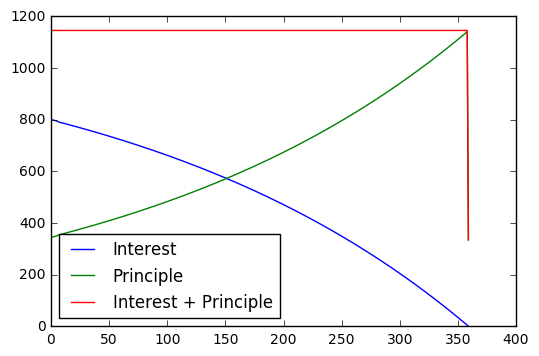

In [4]:
# make plot

fig = plt.figure()
ax = plt.subplot(111)

# plot interest, principle, interest+principle for each month
ax1 = ax.plot(res['PmtNo'], res['Interest'], label='Interest')
ax2 = ax.plot(res['PmtNo'], res['Principle'], label='Principle')
ax3 = ax.plot(res['PmtNo'], res['Principle'] + res['Interest'], label='Interest + Principle' )

# add prepayment as bar chart
#ax4 = ax.bar(res['PmtNo'], res['Prepayment'], label = 'Pre-payment')

ax.legend(loc = 'best')
plt.show()

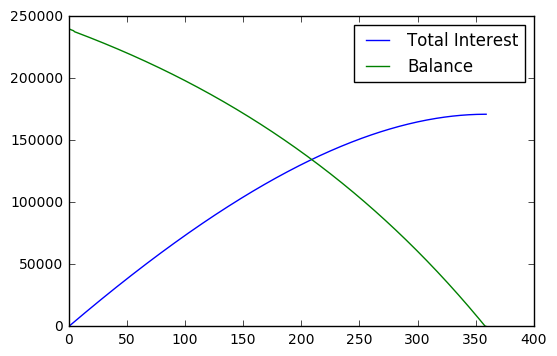

In [5]:
# make plot

fig2 = plt.figure()
ax = plt.subplot(111)

# plot interest, principle, interest+principle for each month
ax1 = ax.plot(res['PmtNo'], res['Total Interest'], label='Total Interest')
ax2 = ax.plot(res['PmtNo'], res['Balance'], label='Balance')

ax.legend()
plt.show()